# Exploratory Data Anaylsis - 2019 Census Data

In [1]:
# import libraries

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import *

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

### Note

The raw data has already been filtered to include only columns that map to the original 1994 data (as well as additional columns) and to only include those over the age of 16, with a non-zero hours-per-week worked, and non-zero income.

- DIVISION: Geographic Division (Puerto Rico, New England, Middle Atlantic, East North Central, West North Central, South Atlantic, East South Central, West South Central, Mountain, Pacific)
- PUMA: Personal Use Microdata Area (a specific designation of geography given by the Census)
- REGION: Region (Northeast, Midwest, South, West, Puerto Rico)
- ST: State
- PWGTP: Person-weight (used to determine statistical weight of one person's response)
- AGEP: Age
- CIT: Citizenship status
- COW: Class of Worker
- SCHL: Educational attainment (NOT years of schooling, number corresponds to a level)
- MAR: marital status (1.Married, 2.Widowed,3.Divorced, 4.Separated, 5.Never married)
- OCCP: occupation (based on 2018 OCC codes)
- RESLSHIPP: relationship (whether person filling out information is actual reference person or someone else)
- RAC1P: race
- SEX: 1 male, 2 female (only 2 options)
- INTP: interest, dividends, and net rental income past 12 months (analagous to capital gains, not present in 2018 census)
- WKHP: Usual hours worked per week past 12 months
- FOD1P: Field of degree
- POBP: place of birth (pertains to numerical code including states and countries)
- PINCP: Total person's income
- SCIENGP: stem degree (binary)


See data dictionary: https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMS_Data_Dictionary_2019.pdf

In [3]:
# Importing the Data Set
df_2019 = pd.read_csv("2019_new-var_mapped_processed.csv")
df_2019.head()

,Geographic-division,area-code,region,state,RT,person-weight,age,citizenship-status,class-worker,education,...,occupation,relationship,race,sex,extra-income,hours-per-week,field-of-degree,place-of-birth,income,stem-degree
0,East South Central,1100,South,AL,P,20,19,Born-US,Private-nonprof,some-college-great1,...,OFF-Customer Service Representatives,38,black-aa-alone,male,0.0,32.0,NaN,Alabama/AL,1400.0,NaN
1,East South Central,2100,South,AL,P,61,39,Born-US,State-gov,bachelor,...,HLS-Personal Care Aides,37,white-alone,female,0.0,40.0,English Language And Literature,Alabama/AL,60000.0,No
2,East South Central,301,South,AL,P,89,19,Born-US,Private-prof,some-college-great1,...,SAL-Cashiers,38,black-aa-alone,male,0.0,31.0,NaN,Alabama/AL,390.0,NaN
3,East South Central,2100,South,AL,P,61,39,Born-US,State-gov,bachelor,...,HLS-Personal Care Aides,37,white-alone,female,0.0,40.0,English Language And Literature,Alabama/AL,60000.0,No
4,East South Central,2000,South,AL,P,49,21,Born-US,Private-prof,some-college-great1,...,"EAT-Hosts And Hostesses, Restaurant, Lounge, A...",38,white-alone,male,0.0,12.0,NaN,New York/NY,4440.0,NaN


## EDA with categorical variables like the original dataset

In [4]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672300 entries, 0 to 1672299
Data columns (total 21 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Geographic-division  1672300 non-null  object 
 1   area-code            1672300 non-null  int64  
 2   region               1672300 non-null  object 
 3   state                1672300 non-null  object 
 4   RT                   1672300 non-null  object 
 5   person-weight        1672300 non-null  int64  
 6   age                  1672300 non-null  int64  
 7   citizenship-status   1672300 non-null  object 
 8   class-worker         1672300 non-null  object 
 9   education            1672300 non-null  object 
 10  marital-status       1672300 non-null  object 
 11  occupation           1672300 non-null  object 
 12  relationship         1672300 non-null  int64  
 13  race                 1672300 non-null  object 
 14  sex                  1672300 non-null  object 
 15

In [5]:
print(df_2019.shape)

(1672300, 21)


### 1.6 million rows, 21 columns

In [6]:
# checking null values
df_2019.isnull().sum(axis = 0)

Geographic-division          0
area-code                    0
region                       0
state                        0
RT                           0
person-weight                0
age                          0
citizenship-status           0
class-worker                 0
education                    0
marital-status               0
occupation                   0
relationship                 0
race                         0
sex                          0
extra-income                 0
hours-per-week               0
field-of-degree        1055853
place-of-birth               0
income                       0
stem-degree            1055853
dtype: int64

This makes sense - if someone has not graduated from college they won't have a field of degree or stem degree designation.

In [7]:
df_2019.columns

Index(['Geographic-division', 'area-code', 'region', 'state', 'RT',
       'person-weight', 'age', 'citizenship-status', 'class-worker',
       'education', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'extra-income', 'hours-per-week', 'field-of-degree',
       'place-of-birth', 'income', 'stem-degree'],
      dtype='object')

In [8]:
# exploring income - target variable

df_2019['income'].value_counts()

30000.0     43775
40000.0     42020
50000.0     41409
60000.0     35926
20000.0     32566
            ...  
33570.0         1
538100.0        1
538300.0        1
33660.0         1
131090.0        1
Name: income, Length: 19113, dtype: int64

Looks like we have a mix of whole number variables - people must have been given the option to check a box, or to enter in the exact amount.

In [9]:
df_2019['income'].describe()

count    1.672300e+06
mean     6.017929e+04
std      7.677522e+04
min      1.040000e+02
25%      2.000000e+04
50%      4.000000e+04
75%      7.200000e+04
max      1.629000e+06
Name: income, dtype: float64

The maximum income is 1629000.0
The minimum income is 104.0


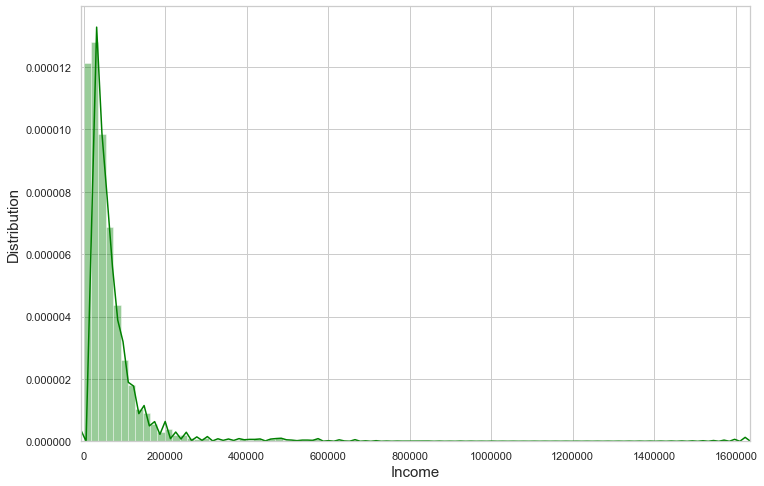

In [10]:
# distribution of income  

plt.rcParams['figure.figsize'] = [12, 8]
sns.set(style = 'whitegrid')

sns.distplot(df_2019['income'], bins = 90, color = 'green')
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Income", fontsize = 15)
plt.margins(x = 0)

print ("The maximum income is", df_2019['income'].max())
print ("The minimum income is", df_2019['income'].min())

In [12]:
# age

df_2019['age'].describe()

count    1.672300e+06
mean     4.365817e+01
std      1.540178e+01
min      1.700000e+01
25%      3.100000e+01
50%      4.400000e+01
75%      5.600000e+01
max      9.600000e+01
Name: age, dtype: float64

The maximum age is 96
The minimum age is 17


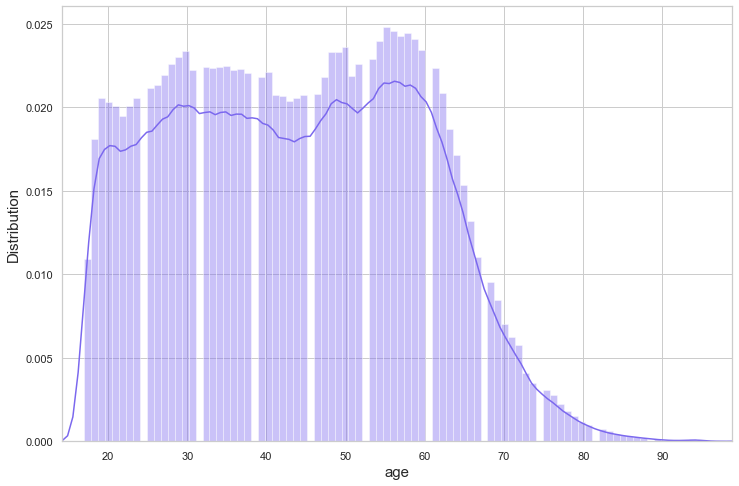

In [14]:
# distribution of Age 

plt.rcParams['figure.figsize'] = [12, 8]
sns.set(style = 'whitegrid')

sns.distplot(df_2019['age'], bins = 90, color = 'mediumslateblue')
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("age", fontsize = 15)
plt.margins(x = 0)

print ("The maximum age is", df_2019['age'].max())
print ("The minimum age is", df_2019['age'].min())

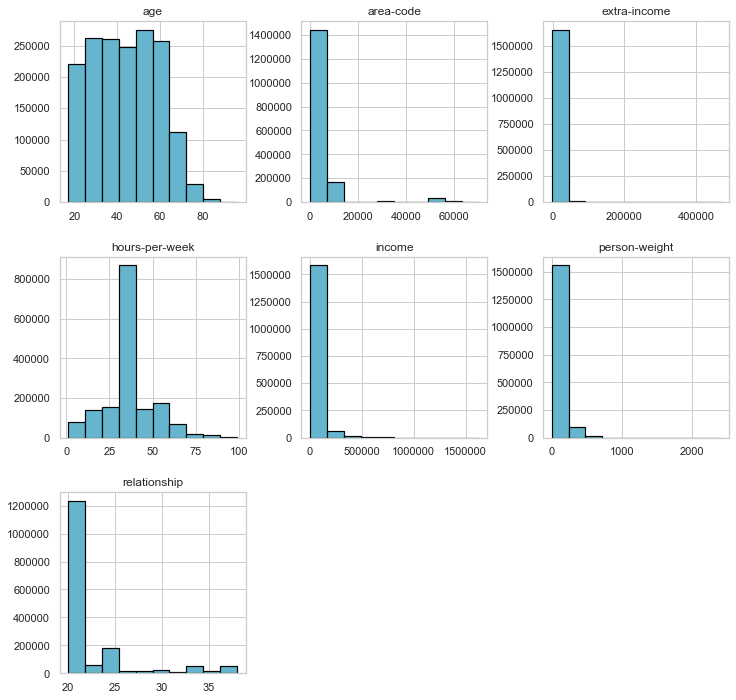

In [15]:
# Distribution of Different numerical features of the Dataset
distribution = df_2019.hist(edgecolor = 'black', linewidth = 1.2, color = 'c')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()


In [16]:
# hours per week - mean vs median - are there outliers?

print (df_2019['hours-per-week'].median())
print (df_2019['hours-per-week'].mean())

40.0
38.22959995216169


In [17]:
# class of worker

df_2019['class-worker'].value_counts()

Private-prof        1080559
Private-nonprof      150023
Local-gov            134927
Self-emp-not-inc     106917
State-gov             74246
Self-emp-inc          65919
Fed-gov               54350
Without-pay            5359
Name: class-worker, dtype: int64

In [18]:
# education

df_2019['education'].value_counts()

bachelor               378297
HSgrad                 342296
some-college-great1    249710
master                 166634
associate              154224
some-college-less1     120693
GED                     56414
prof-school             42512
grade11                 33419
doctorate               29004
grade12-nograd          27036
grade10                 18292
no-school               15860
grade9                  12414
grade6                   8500
grade8                   8228
grade7                   2412
grade5                   1803
grade3                   1668
grade4                   1114
grade2                    796
grade1                    421
preschool                 294
kindergarten              259
Name: education, dtype: int64

In [19]:
# relationship - how many people are filling it out for themselves?

df_2019['relationship'].value_counts()

20    830368
21    404880
25    179859
22     56607
38     44199
34     39379
36     18725
28     17060
33     14644
30     12017
37     10905
27     10286
32      9238
29      9156
26      4931
23      4739
24      3477
31      1718
35       112
Name: relationship, dtype: int64

In [27]:
df_2019['field-of-degree'].describe()

count                                     616447
unique                                       173
top       Business Management And Administration
freq                                       37755
Name: field-of-degree, dtype: object

In [28]:
df_2019['field-of-degree'].value_counts()

Business Management And Administration    37755
Psychology                                28503
Nursing                                   25922
General Business                          24393
Accounting                                23117
                                          ...  
Physical Sciences                           115
Geological And Geophysical Engineering       98
Soil Science                                 87
Court Reporting                              59
Military Technologies                        48
Name: field-of-degree, Length: 173, dtype: int64

In [29]:
df_2019['place-of-birth'].describe()

count           1672300
unique              223
top       California/CA
freq             142981
Name: place-of-birth, dtype: object

In [30]:
df_2019['place-of-birth'].value_counts()

California/CA      142981
New York/NY        111402
Texas/TX            94627
Pennsylvania/PA     75819
Illinois/IL         71730
                    ...  
Samoa                  63
Guinea                 60
South America          52
Rwanda                 50
South Sudan            45
Name: place-of-birth, Length: 223, dtype: int64

In [20]:
# race
df_2019['race'].value_counts()

white-alone              1306709
black-aa-alone            144781
asian-alone               100817
other-race-alone           60944
two-or-more-races          41913
american-indian-alone      11430
native-hi-pac-isl           2819
indian-or-ak-native         2016
alaska-native-alone          871
Name: race, dtype: int64

Black-African American alone - only 8.6% of the data - this is less than the 13% of the US as a whole - but perhaps `two-or-more-races` is included in the 13% tally.

In [25]:
print(144781/1672300)

0.08657597321054834


In [21]:
# extra income - is this worth including?
df_2019['extra-income'].describe()

count    1.672300e+06
mean     1.800545e+03
std      1.679246e+04
min     -2.600000e+03
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.690000e+05
Name: extra-income, dtype: float64

In [22]:
df_2019['extra-income'].value_counts()

0.0         1474499
1000.0         8339
100.0          7409
5000.0         6709
10000.0        6378
             ...   
119000.0          1
180000.0          1
42400.0           1
186000.0          1
49700.0           1
Name: extra-income, Length: 758, dtype: int64

looks like the bulk of people in the dataset do not have extra income reported on the census

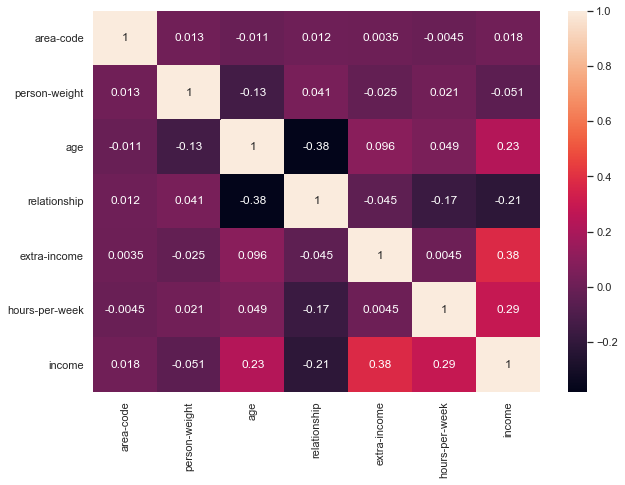

In [23]:
# heatmap shows the Correlation between the different variables
plt.rcParams['figure.figsize'] = [10,7]
sns.heatmap(df_2019.corr(), annot = True);

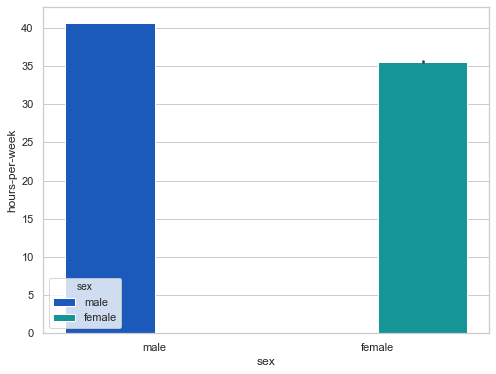

In [24]:
# difference of hours per week between male and female 
sns.set(style = 'whitegrid', rc={'figure.figsize':(8,6)})
sns.barplot(x = df_2019['sex'], y = df_2019['hours-per-week'], data = df_2019,
            estimator = mean, hue = 'sex', palette = 'winter');

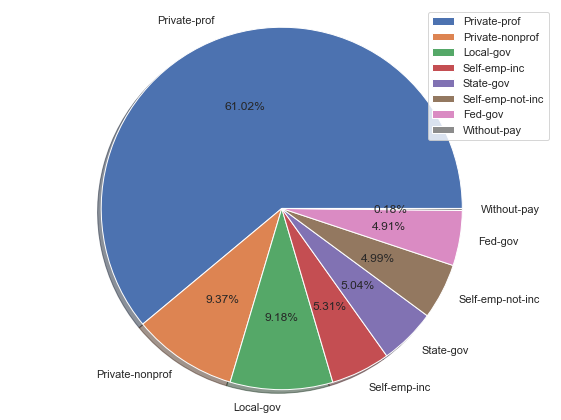

In [32]:
# Creating Series for the class-of-worker whose income is higher than 50K 
df_ = df_2019.loc[df_2019['income'] > 50000,['class-worker']]
workclass_types = df_['class-worker'].value_counts()
labels = list(workclass_types.index)
aggregate = list(workclass_types)

# pie chart - Percentage of different class of worker who earns more than 50K
plt.pie(aggregate, labels = labels, autopct='%1.2f%%', shadow=True)
plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show()

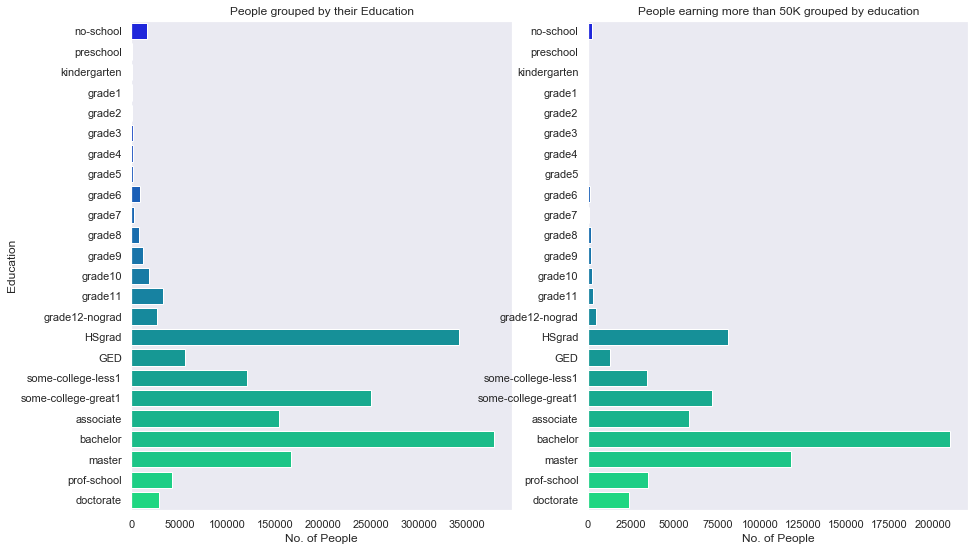

In [33]:
# Grouping people by their education
education_size = df_2019.groupby('education').size()

# Grouping people who earns more than 50K by their education
more_income = df_2019.loc[df_2019['income']> 50000, ['education']].groupby('education').size()

sns.set(style = 'dark')
plt.rcParams['figure.figsize'] = [15, 9]
fig, ax = plt.subplots(1,2)

# Setting axes Labels and Titles
ax[0].set_ylabel("Education")
ax[0].set_xlabel("No. of People")
ax[1].set_xlabel("No. of People")
ax[0].title.set_text("People grouped by their Education")
ax[1].title.set_text("People earning more than 50K grouped by education")

# Barplot for the people grouped by their education
sns_ed_1 = sns.barplot(x = list(education_size), y = list(education_size.index), palette = 'winter',
                       order = ['no-school', 'preschool', 'kindergarten', 
                               'grade1', 'grade2', 'grade3', 'grade4', 'grade5', 
                               'grade6', 'grade7', 'grade8', 'grade9', 'grade10',
                               'grade11', 'grade12-nograd','HSgrad', 'GED',
                               'some-college-less1', 'some-college-great1', 'associate',
                               'bachelor', 'master', 'prof-school', 'doctorate'], ax = ax[0])

# Barplot for the people who earns more than 50K grouped by their education
sns_ed_2 = sns.barplot(x = list(more_income), y = list(more_income.index), palette = 'winter',
                       order = ['no-school', 'preschool', 'kindergarten', 
                               'grade1', 'grade2', 'grade3', 'grade4', 'grade5', 
                               'grade6', 'grade7', 'grade8', 'grade9', 'grade10',
                               'grade11', 'grade12-nograd','HSgrad', 'GED',
                               'some-college-less1', 'some-college-great1', 'associate',
                               'bachelor', 'master', 'prof-school', 'doctorate'], ax = ax[1])

## Grouping by race and income

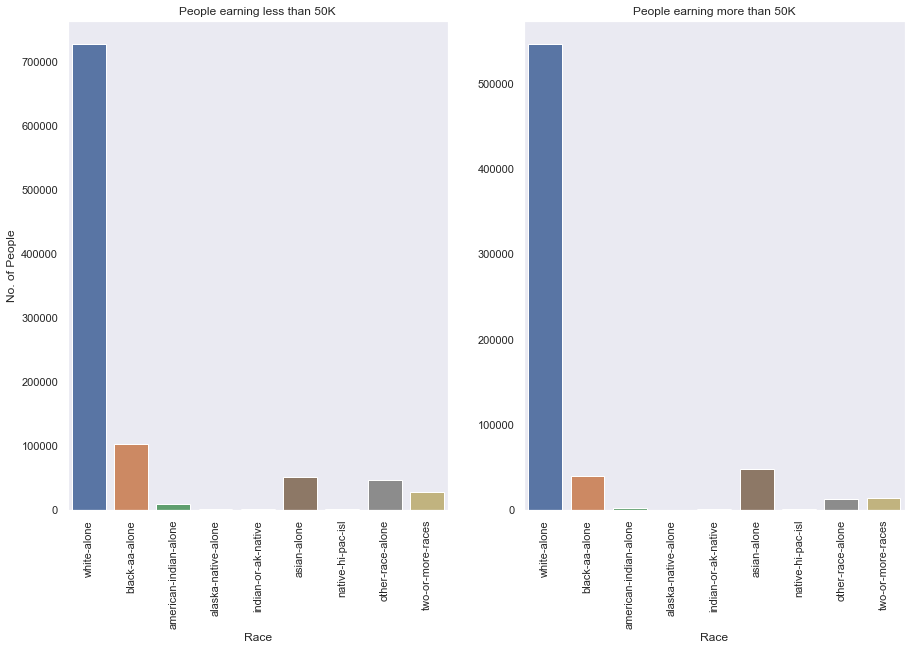

In [34]:
# axes Labels and Titles 
fig, ax = plt.subplots(1,2)
ax[0].set_xlabel('Race')
ax[1].set_xlabel('Race')
ax[0].set_ylabel('No. of People')
ax[0].title.set_text("People earning less than 50K")
ax[1].title.set_text("People earning more than 50K")

# group by race and income
race_less = df_2019.loc[df_2019['income']< 50000].groupby('race').size()
race_more = df_2019.loc[df_2019['income']> 50000].groupby('race').size()

# This barplot shows the no.of people earning more or less than 50K according to their races
sns_race_1 = sns.barplot(x = list(race_less.index), y = list(race_less), ax = ax[0],
                         order = ['white-alone', 'black-aa-alone',
                                  'american-indian-alone', 'alaska-native-alone','indian-or-ak-native',
                                 'asian-alone', 'native-hi-pac-isl', 'other-race-alone',
                                 'two-or-more-races'])
sns_race_2 = sns.barplot(x = list(race_more.index), y = list(race_more), ax = ax[1],
                        order = ['white-alone', 'black-aa-alone',
                                  'american-indian-alone', 'alaska-native-alone','indian-or-ak-native',
                                 'asian-alone', 'native-hi-pac-isl', 'other-race-alone',
                                 'two-or-more-races'])

plt.setp(sns_race_1.get_xticklabels(), rotation = 90);
plt.setp(sns_race_2.get_xticklabels(), rotation = 90);